In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from desiutil.plots import init_sky, plot_healpix_map, plot_grid_map, plot_sky_circles, plot_sky_binned, prepare_data

In [3]:
import warnings

In [7]:
import os

In [4]:
import mpl_toolkits

In [5]:
from desitarget.targetmask import desi_mask
import fitsio
import numpy as np

In [11]:
path = '/Users/kevinnapier/research/desi/'

In [12]:
dd = fitsio.read(os.path.join(path, 'targets-dr3.1-0.8.1.fits'), 
                 ext=1, columns=['RA','DEC','DESI_TARGET']) #rows=np.arange(numsources),

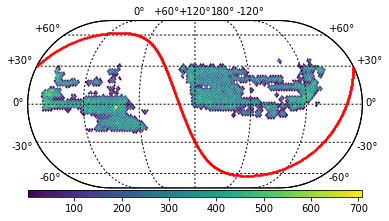

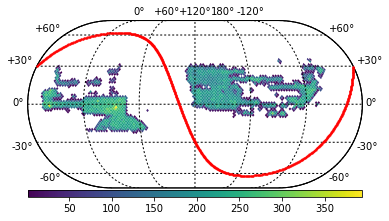

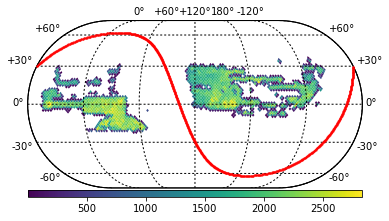

In [13]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for obj in ('LRG', 'QSO', 'ELG'):
        cut = np.where((dd['DESI_TARGET'] & desi_mask.mask(obj)) != 0)*1
        plt.figure()
        plot_sky_binned(dd['RA'][cut], dd['DEC'][cut], verbose=False, clip_lo='!1', plot_type='healpix');